# <center>  Desafio Martes 06 Agosto
## Jose Gomez
    
## 1. Importar librerías y .csv
Importe las librerías básicas para el análisis de datos<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Descarge e importe el archivo __nations.csv__.<br>

<div class="alert alert-block alert-danger">
<b>Warning:</b> va a encontrar un <font color = 'red'>Error</font> en el formato<br>
¿Cómo lo podemos solucionar?.<br>
</div>

- Agregar __encoding='latin-1'__ para que lo lea correctamente

In [2]:
df = pd.read_csv('nations.csv',encoding='latin-1')
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


La base de datos contiene información a nivel mundial sobre demografía:
- __country__ : País.
- __region__ : Continente del país.
- __gdp__ : Producto Interno Bruto per cápita, precios 2005.
- __school__ : Promedio años de escolaridad.
- __adfert__ : Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
- __chldmort__ : Probabilidad de muerte antes de los 5 años por cada 1000.
- __life__ : Esperanza de vida al nacer.
- __pop__ : Población total.
- __urban__ : Porcentaje de población urbana.
- __femlab__ : Tasa entre hombres y mujeres en el mercado laboral.
- __literacy__ : Tasa de alfabetismo.
- __co2__ : Toneladas de Co2 mitidas per cápita.
- __gini__ : Coeficiente de desigualdad del ingreso.
<br><br>

<div class="alert alert-block alert-warning">
<b>Ojo:</b> Apellidos desde la A hasta la N: Enfocarse en las variables:<br> 
    - chldmort<br>
    - adfert<br>
    - life<br>
</div><br>

## 2. Refactor gráficos matplotlib a seaborn
A continuación se presenta una serie de gráficos construídos con matplotlib . <br>
Se le pide refactorizarlos utilizando **seaborn** .<br>
- Se presenta la función que se utilizó para construírlos. <br>
Intente llegar al resultado con mayor similitud. 


__Comente los principales resultados de los gráficos.__<br>

# a)

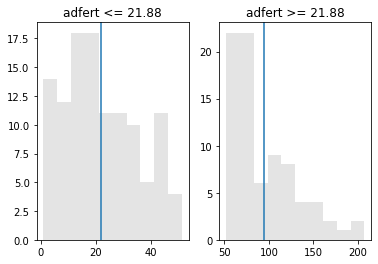

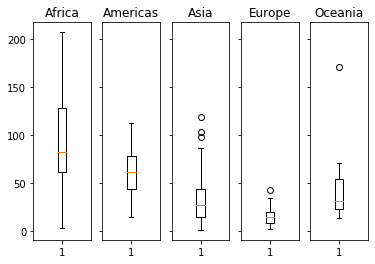

In [3]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
binarize_histogram(df, 'adfert')

def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
grouped_boxplot(df, 'adfert', 'region')

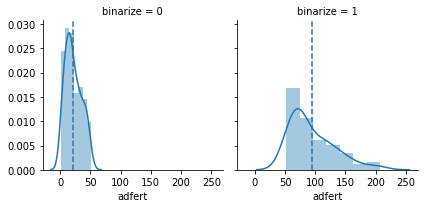

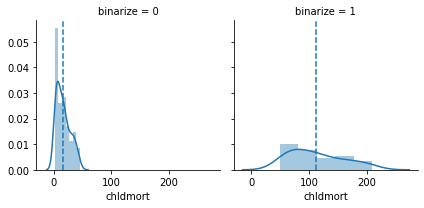

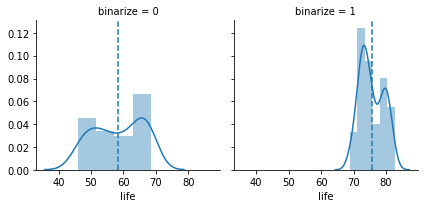

In [4]:
def sns_distplot_1(dataframe, variable):
    dataframe['binarize'] = np.where(dataframe[variable] > np.mean(dataframe[variable]), 1, 0)
    dataframe
    grid = sns.FacetGrid(dataframe, col='binarize')
    grid = grid.map(sns.distplot, variable)

# Seleccionar los ejes del grafico (Modo: Videos) 
    axes = grid.axes.flatten()
    #axes[0].axvline(np.mean(dataframe[variable]),color='r',ls='--') # Promedio total
    axes[0].axvline(np.mean(dataframe[dataframe['binarize']== 0][variable].dropna()), ls='--')
    axes[1].axvline(np.mean(dataframe[dataframe['binarize']== 1][variable].dropna()), ls='--')   

sns_distplot_1(df, 'adfert')
sns_distplot_1(df, 'chldmort')
sns_distplot_1(df, 'life')

<div class="alert alert-block alert-warning">
<b>Comentario:</b> Hay mayor cantidad de países con fertilidad adolecente menor al promedio del mundo. Su fertilidad es similar.<br>
Hay menor cantidad de países con fertilidad adolecente superior al promedio del mundo y sus tasas de fertilidad son más variadas (mayor desviasión estandard).<br>
    Los mismo ocurreo con la tasa de mortalidad.<br>
    Sin embargo, en la esperanza de vida, el efecto es inverso
</div><br>

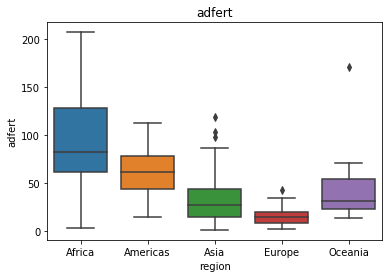

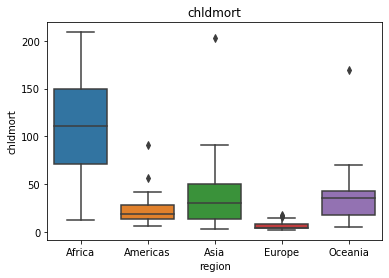

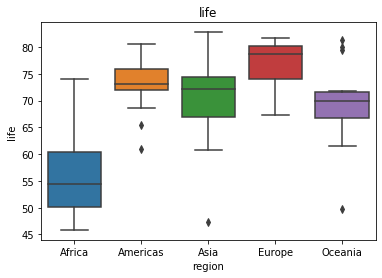

In [5]:
def sns_boxplot_1(dataframe, variable, group_by):
    sns.boxplot(x=group_by, y=variable, data=dataframe).set_title(variable)
    plt.show()
sns_boxplot_1(df,'adfert','region')
sns_boxplot_1(df,'chldmort','region')
sns_boxplot_1(df,'life','region')


# b)

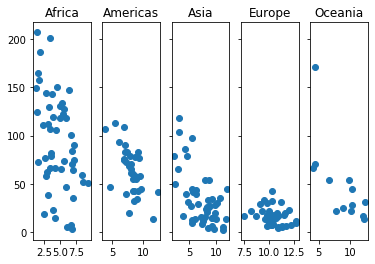

In [6]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)

grouped_scatterplot(df, 'school', 'adfert', 'region')

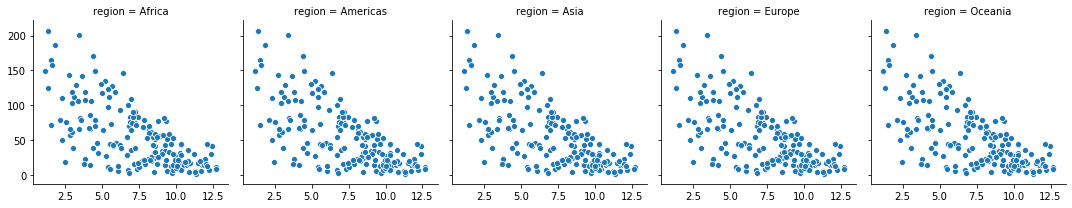

In [7]:
#Metodo visto en los videos
# Con este método no me separa los puntos del grafico, 
# sino que los grafica todos juntos pero en diferentes grupos
# O sea, hace 5 graficos iguales (1 por cada continente)

#def sns_scatter_2(dataframe, x, y, group_by):
#    grid = sns.FacetGrid(dataframe, col=group_by)
    
#    grid = grid.map(sns.scatterplot, x=dataframe[x], y=dataframe[y])
    
#sns_scatter_2(df, 'school', 'adfert', 'region')   

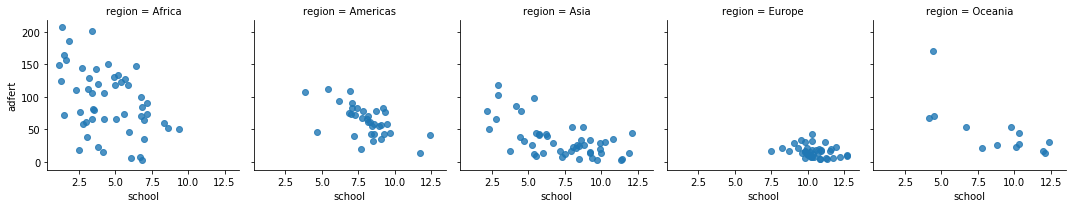

In [23]:
#Metodo visto en google 
def scatter2(dataframe, x, y, group_by):
    sns.lmplot(x=x,y=y,col=group_by, data=dataframe, fit_reg=False, height=3)
    
scatter2(df, 'school', 'adfert', 'region')

# 3. Genere un heatmap entre todas las variables
En base a las variables de interés asignadas, comente cuáles son las principales
correlaciones existentes, tomando como criterio de corte aquellas __superior a .6__
<div class="alert alert-block alert-warning">
<b>Ojo:</b> Apellidos desde la A hasta la N: Enfocarse en las variables:<br> 
    - chldmort<br>
    - adfert<br>
    - life<br>
</div><br>

          chldmort    adfert      life
chldmort  1.000000  0.777416 -0.923563
adfert    0.777416  1.000000 -0.729852
life     -0.923563 -0.729852  1.000000


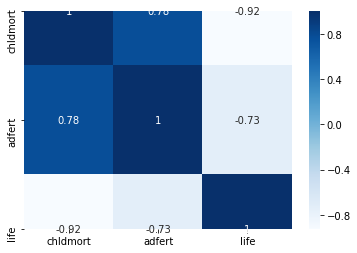

In [8]:
subset_df = df.loc[:,['chldmort','adfert','life']].dropna()
#subset_df.head()
subset_corr = subset_df.corr()
sns.heatmap(subset_corr, cmap='Blues',annot=True)
print(subset_corr)

<div class="alert alert-block alert-info">
<b>Comentario:</b> Hay alta correlacion entre la fertilidad adolecente y la mortalidad infantil. Esto significa que los hijos de menores de edad tienen alta probabilidad de morir antes de los 5 años.
    Por el contrario, hay una baja correlación entre la calidad de vida y la fertilidad infantil o la tasa de mortalidad infantil.<br>
    O sea, mueren por pesima calidad de vida.
</div>



# 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones
- tip: Genere una nueva tabla segmentando con la siguiente sintáxis:<br> 
tmp = df.loc[:,['variables', 'a', 'agregar']] <br> 
No olvide agregar la variable region .<br>
- tip: Genere un loop para recorrer cada región y generar un heatmap.
Comente brevemente las principales correlaciones a través de las regiones.

adfert mean: 92.72115342892131
chldmort mean: 109.75
Región: Africa
           chldmort    adfert      life
chldmort  1.000000  0.709293 -0.828168
adfert    0.709293  1.000000 -0.583898
life     -0.828168 -0.583898  1.000000


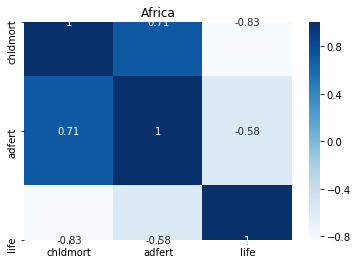

adfert mean: 63.659999847412095
chldmort mean: 23.264285714285716
Región: Americas
           chldmort    adfert      life
chldmort  1.000000  0.282007 -0.881576
adfert    0.282007  1.000000 -0.236169
life     -0.881576 -0.236169  1.000000


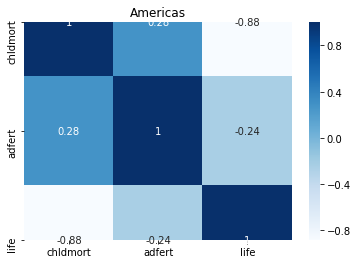

adfert mean: 33.86530622170896
chldmort mean: 37.104166666666664
Región: Asia
           chldmort    adfert      life
chldmort  1.000000  0.666864 -0.911554
adfert    0.666864  1.000000 -0.654372
life     -0.911554 -0.654372  1.000000


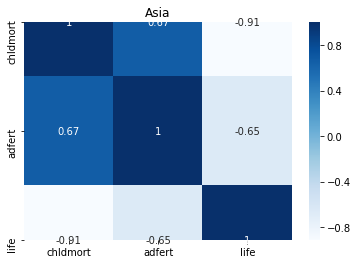

adfert mean: 15.537209313969276
chldmort mean: 7.046511627906977
Región: Europe
           chldmort    adfert      life
chldmort  1.000000  0.748192 -0.818645
adfert    0.748192  1.000000 -0.773102
life     -0.818645 -0.773102  1.000000


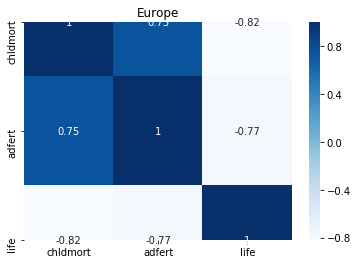

adfert mean: 44.99333400726322
chldmort mean: 39.416666666666664
Región: Oceania
           chldmort    adfert      life
chldmort  1.000000  0.883204 -0.830154
adfert    0.883204  1.000000 -0.778737
life     -0.830154 -0.778737  1.000000


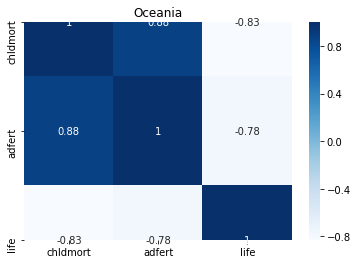

In [10]:

regiones = df['region'].unique() # ['Africa' 'Americas' 'Asia' 'Europe' 'Oceania']
for i in regiones:
    loc_df = df[df['region']==i]
    tmp2 = loc_df.loc[:,['chldmort','adfert','life']]
    tmp2_corr = tmp2.corr()
    print("adfert mean:",tmp2['adfert'].mean())
    print("chldmort mean:",tmp2['chldmort'].mean())
    print(f"Región: {i}\n",tmp2_corr) # Lo imprimo porque se ve mal en mi jupyter (No se cómo arreglarlo)
    sns.heatmap(tmp2_corr, cmap='Blues',annot=True).set_title(i)
    plt.show()


Comente brevemente las principales correlaciones a través de las regiones.
<div class="alert alert-block alert-info">
<b>Comentarios:</b><br>
Tanto la mortalidad infantil como la fertilidad infantil se corelacionan negativamente con la esperanza de vida al nacer. Al mejorar la esperanza de vida, disminuye sus probabilidades de morir o tener hijos a temprana edad.<br> 
En relación a la natalidad infantil y la mortalidad, la gran diferencia se nota entre Americas y Oceanía (menor y mayor, respectivamente). <br> 
De hecho, en Americas la corelación entre la esperanza de vida y la tasa de fertilidad infantil es -0.2, si bien es negativa, no es tanto en comparación a Europe y Oceanía. Esto significa, que a medida que aumenta la esperanza, no necesariamente disminuirá en gran medida la tasa de fertilidad juvenil. 
</div>

# Bonus Points: Grafique los diagramas de dispersión para los principales hallazgos.
Anteriormente mencioné que me llamó la atención Americas y Oceanía, por sus extremos en la tasa de natalidad juvenil y esperanza de vida.

adfert mean: 63.659999847412095


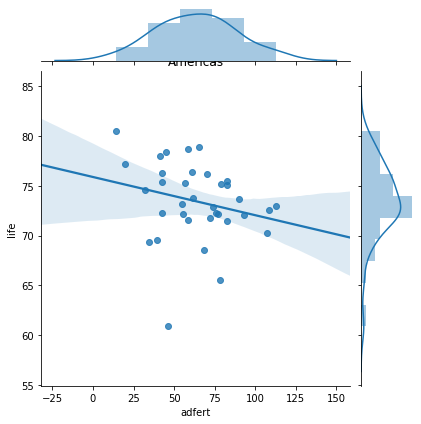

adfert mean: 44.99333400726322


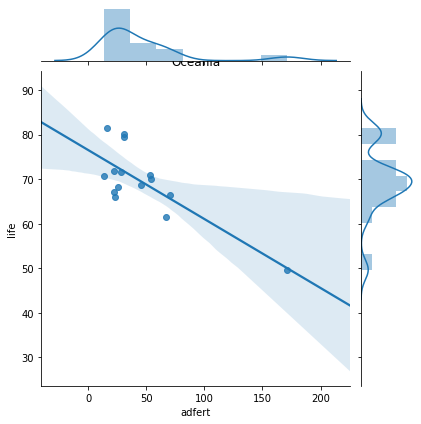

In [12]:

regiones = df['region'].unique() # ['Africa' 'Americas' 'Asia' 'Europe' 'Oceania']
for i in regiones:
    if i == 'Americas' or i == 'Oceania':
        loc_df = df[df['region']==i]
        tmp2 = loc_df.loc[:,['adfert','life']]
        
        print("adfert mean:",tmp2['adfert'].mean())
        #print("chldmort mean:",tmp2['chldmort'].mean())
        #print(f"Región: {i}\n",tmp2_corr) # Lo imprimo porque se ve mal en mi jupyter (No se cómo arreglarlo)
        sns.jointplot(tmp2['adfert'], tmp2['life'], kind='reg')
        plt.title(i)
        plt.show()

adfert mean: 63.659999847412095


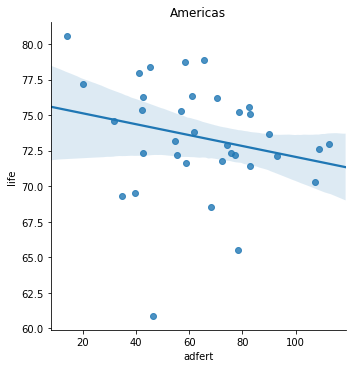

adfert mean: 44.99333400726322


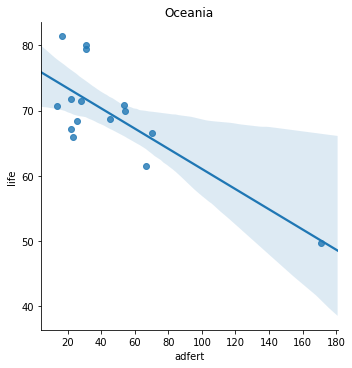

In [25]:
regiones = df['region'].unique() # ['Africa' 'Americas' 'Asia' 'Europe' 'Oceania']
for i in regiones:
    if i == 'Americas' or i == 'Oceania':
        loc_df = df[df['region']==i]
        tmp2 = loc_df.loc[:,['adfert','life']]
        
        print("adfert mean:",tmp2['adfert'].mean())
        #print("chldmort mean:",tmp2['chldmort'].mean())
        #print(f"Región: {i}\n",tmp2_corr) # Lo imprimo porque se ve mal en mi jupyter (No se cómo arreglarlo)
        #sns.jointplot(tmp2['adfert'], tmp2['life'], kind='reg')
        sns.lmplot(x='adfert',y='life',data=tmp2)
        plt.title(i)
        plt.show()